## Finding 𝜔0 𝑘 𝑏 values

$w^2 = \frac{k}{m}$

- so to find 3 versions of $k$ from the 3 diff trials

$\alpha = \frac{\beta}{2m}$


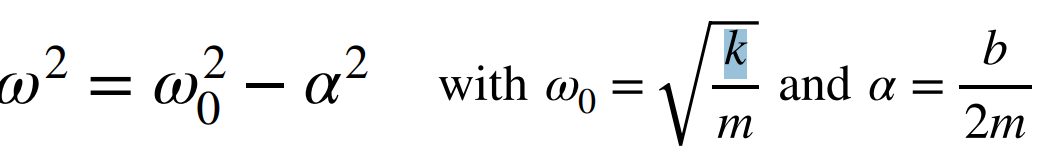




# Run 1 mass 10 g 

$w^2 = w_{0}^2 - \alpha^2$


$k = (\omega^2 + \alpha^2)*m$

$\omega_{0} = \sqrt{\omega^2+\alpha^2}$

$b = \alpha*2m$
b = drag coefficient

if taking uncertainty of $a=b*c$ for divisions & products

$(\delta a/a)^2 = (\delta b/b)^2 +(\delta c/c)^2$
so $\delta a = a*\sqrt{(\delta b/b)^2 +(\delta c/c)^2}$

if taking uncertainty of $a=b+c$ adding or subtracting
$(\delta a) = \sqrt{(\delta b)^2 +(\delta c)^2}$

## Setup Functions

In [1]:
import numpy as np

In [3]:
######################

####### Calculation Methods #########
def calcB(delalp,alp,delma,ma):
    '''Calculate B value given (deltaAlpha, Alpha, deltaMass, Mass).'''
    ############################
    # Calculation for b
    
    # b = 2*alpha*mass

    # central value of b
    b = 2*alp*ma
    # uncertainty of b
    delb = 2*b*np.sqrt((delma/ma)**2+(delalp/alp)**2)

    #print(f'b = {b:.5f} +/- {delb:.5f}') 
    return (b,delb)

def calcOmega0(delome,ome,delalp,alp):
    '''Calculate Omega0 value given (deltaOmega, Omega, deltaAlpha, alpha).'''
    ############################
    # Calculation for omega(0)

    # omega(0) = sqrt(omega^2 + alpha^2)

    # central value of omega(0)
    omeganot = np.sqrt(ome**2+alp**2)
    # uncertainty of omega(0)
    delomeganot = 0.5*omeganot*((np.sqrt((2*omeganot*(delome/ome)))**2+((2*omeganot*(delalp/alp)))**2)/(ome**2+alp**2))

    #print(f'omeganot = {omeganot:.5f} +/- {delomeganot:.5f}') 
    return (omeganot,delomeganot)

def calcK(delomenot,omenot,delma,ma):
    '''Calculate K value given (deltaOmega0, omega0, deltaMass, mass).'''
    ###################
    # calc of k

    # k = omeganot^2 * m

    # central value
    k = omenot**2*ma

    # uncertainty of k
    deltak = np.sqrt(((2*delomenot/omenot)**2+(delma/ma)**2))

    #print(f'k = {k:.5f} +/- {deltak:.5f}') 
    return (k,deltak)


# Now calculate all these for the test case.

# test run
alpha = 0.014091
delalpha = .00016677
omega = 5.93881
delomega = 0.00016509
m = 10.
delm =0.1

# where testB is an array of size 2, testB[0] = central value, testB[1] = uncertainty
testB = calcB(delalpha,alpha,delm,m)
testOmega0 = calcOmega0(delomega,omega,delalpha,alpha)  # so that testOmega0[0] = central value of omega0, [1] = uncertainty
testK = calcK(testOmega0[1],testOmega0[0],delm,m)

print(testB)
print(testOmega0)
print(testK)

(0.28181999999999996, 0.008733188283782733)
(5.938826716817136, 0.0016915286102279034)
(352.69662772381, 0.010016211958687703)


## Data Input
- now run through each mass and perform the 3 calculations for the 3 runs at each of the masses
- so have loop through masses (I think I can do this without looping them bc numpy, but it's confusing so no)
- then run all 3 functions (maybe inputting np arrays if it'll let me)

In [4]:
# loop through the 3 different masses
# going to 4 dec places 4 sigfigs (or try to)

masses = np.array([10,20,24.4])
delmasses = np.array([0.1,0.1,0.1])

# loop through each run (3 of each mass)

# Store everything in a matrix of runs, & corresponds to capstone data
# so that runs[0][0] = run 1, Amplitude value, runs[0][1] = alpha, etc.
# Just so that we have all the data from capstone off there, bc capstone slow and computers slow

# runs = np.array([[ first run (10g mass)],[second run (10g mass)],[nth run])
# structure is [[A,B(which is actually alpha),omega,phi,C],[run 2 data], etc]
runs = np.array([[0.202496,0.014091,5.93881,9.05423,0.804485], # Run 1 (10g mass)
                 [0.224181,0.01706,5.90495,0.03390,0.80249], # Run 2 (10g)
                 [0.197148,0.01547,5.90059,6.65083,0.80129], # Run 3 (10g)
                 [0.272792,0.01157,4.29914,0.49592,0.52559], # Run 1 (20g)
                 [0.247347,0.01117,4.29938,-1.82098,0.523880], # Run 2 (20g)
                 [0.241194,0.01091,4.33506,-10.1449,0.536419], # Run 3 (20g)
                 [0.172314,0.09254,4.00472,-0.59160,0.456626], # Run 1 (24.4g)
                 [0.200,0.0987,4.00,-0.820,0.455], # Run 2 (24.4g) likey issue with data here bc gap in sigfigs
                 [0.196,0.0986,4.01,2.71,0.454] # Run 3 (24.4g) ^^^
                ])

# runserr structure is similar
# runserr is [[dA,dB(actually dAlpha),domega,dphi,dC],[run 2 error data], etc]
runserr = np.array([[0.00070314,0.00016677,0.00016509,0.0034411,0.00018416], #10g
                    [0.00025277,0.00006074,0.00006158,0.0011435,0.00006365], #10g
                    [0.00019620,0.00004778,0.00004716,0.0009817,0.00005041], #10g
                    [0.00021352,0.00002737,0.00002756,0.0007891,0.00006457], #20g
                    [0.00015181,0.00002128,0.00002144,0.0006186,0.00004613], #20g
                    [0.00023727,0.00002523,0.00002504,0.0009731,0.00003167], #20g
                    [0.00084554,0.00063646,0.00062192,0.0046857,0.00012410], #24.4g
                    [0.0012,0.00082,0.00081,0.0057,0.00017], # 24.4g likely big gap in data here
                    [0.0012,0.00082,0.00081,0.0057,0.00017] # 24.4g ^^^
                   ])


bVals = np.zeros((2,len(runs[:])))
omega0Vals = np.zeros((2,len(runs[:])))
kVals = np.zeros((2,len(runs[:])))

#print(bVals)
#  bVals = np array [[10g run b values],[10g run b val +/-],[20g run b val],etc]

# maybe save each value in its respective array so can just do np operations on the array?
# so here alpha and omega are changing, so their indexes are runs[:,1]=alpha, and runs[:,2]=omega
# and delalpha and delomega are changing, so their indexes are runserr[:,1] = delalpha, and runserr[:,2]

# variables dependent on run VVV
alpha = runs[:,1]
delalpha = runserr[:,1]
omega = runs[:,2]
delomega = runserr[:,2]
phi = runs[:,3]
delphi = runserr[:,3]
#print(f'{i=}\n\n{alpha=}\n{delalpha=}\n{omega=}\n{delomega=}')


counter = 0
for i in range(0,3):
    mass = masses[i]
    delmass = delmasses[i]
    
    start = i*3
    end = (i*3)+3
    # then perform the full calculation of k, omega0, and b here (from below)
    # set bVals[i*2] = true value
    # set bVals[i*2+1] = uncertainty for each
    # this is the structure of the other arrays too
    bVals[0][start:end],bVals[1][start:end] = calcB(delalpha[start:end],alpha[start:end],delmass,mass)
    
    # now the w0 values
    omega0Vals[0][start:end],omega0Vals[1][start:end] = calcOmega0(delomega[start:end],omega[start:end],delalpha[start:end],alpha[start:end])
    
    # and lastly the k values (makes use of w0)
    kVals[0][start:end],kVals[1][start:end] = calcK(omega0Vals[1][start:end],omega0Vals[0][start:end],delmass,mass)
    
    
    
    # sigfig=6
    # so now we have k,b,w0 values for all them, so I'm just looking for k,b values with +/- so print those out for each mass
    print('----------')
    print(f'---- For {mass=}+/-{delmass} ------')
    for y in range(0,3):
        print(f'b:{bVals[0][y+start]:.6f} +/- {bVals[1][y+start]:.6f}')
        print(f'k:{kVals[0][y+start]:.6f} +/- {kVals[1][y+start]:.6f}')
        print(f'w0:{omega0Vals[0][y+start]:.6f} +/- {omega0Vals[1][y+start]:.6f}')
        print(f'w: {omega[counter]:.6f} +/- {delomega[counter]:.5f}')
        print(f'a: {alpha[counter]:.6f} +/- {delalpha[counter]:.5f}')
        print(f'phi: {phi[counter]:.6f} +/- {delphi[counter]:.5f}\n')
        counter+=1
    
    
    print('Variance in k and w0 values')
    print(f'k:{np.var(kVals[0][start:end]):.6f}/{np.var(kVals[1][start:end])}')
    print(f'w0:{np.var(omega0Vals[0][start:end]):.6f}/{np.var(omega0Vals[1][start:end])}')

----------
---- For mass=10.0+/-0.1 ------
b:0.281820 +/- 0.008733
k:352.696628 +/- 0.010016
w0:5.938827 +/- 0.001692
w: 5.938810 +/- 0.00017
a: 0.014091 +/- 0.00017
phi: 9.054230 +/- 0.00344

b:0.341200 +/- 0.007244
k:348.687255 +/- 0.010000
w0:5.904975 +/- 0.000160
w: 5.904950 +/- 0.00006
a: 0.017060 +/- 0.00006
phi: 0.033900 +/- 0.00114

b:0.309400 +/- 0.006476
k:348.172017 +/- 0.010000
w0:5.900610 +/- 0.000121
w: 5.900590 +/- 0.00005
a: 0.015470 +/- 0.00005
phi: 6.650830 +/- 0.00098

Variance in k and w0 values
k:4.090294/5.757905062165001e-11
w0:0.000292/5.349616520747867e-07
----------
---- For mass=20.0+/-0.1 ------
b:0.462800 +/- 0.005120
k:369.654772 +/- 0.005000
w0:4.299156 +/- 0.000055
w: 4.299140 +/- 0.00003
a: 0.011570 +/- 0.00003
phi: 0.495920 +/- 0.00079

b:0.446800 +/- 0.004781
k:369.695863 +/- 0.005000
w0:4.299395 +/- 0.000036
w: 4.299380 +/- 0.00002
a: 0.011170 +/- 0.00002
phi: -1.820980 +/- 0.00062

b:0.436400 +/- 0.004808
k:375.857285 +/- 0.005000
w0:4.335074 +/- 0.

### Now the second part with alpha and omega values

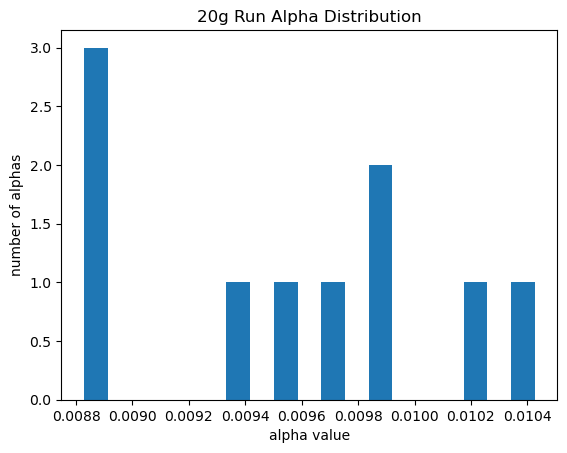

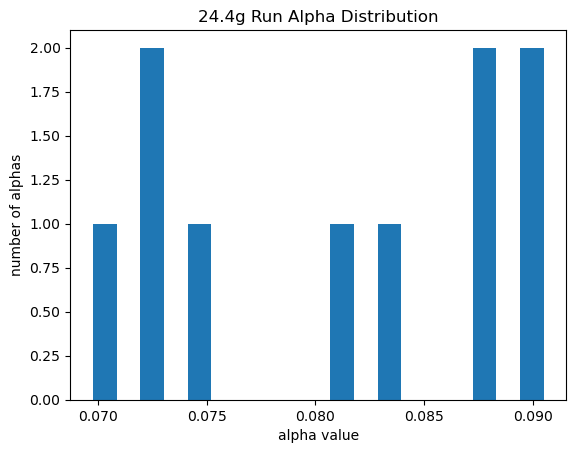

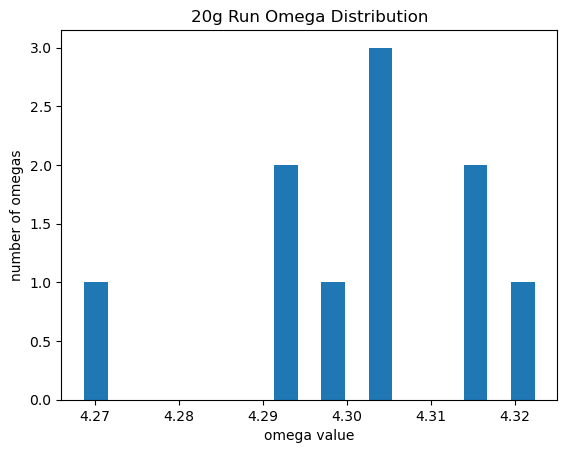

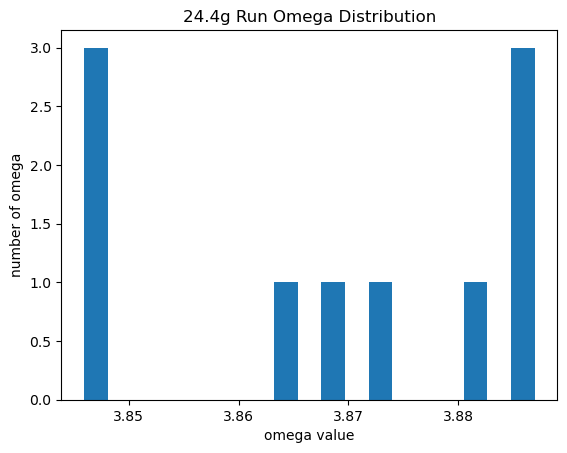

<Figure size 640x480 with 0 Axes>

In [5]:
## Plot histograms of B (alpha) and w (omega) for the two configurations
import matplotlib.pyplot as plt


run_20_alpha = np.array([0.00878592, 0.00991287, 0.00895325, 0.00942581, 0.00963081, 0.0104688, 0.0101966, 0.00879225, 0.00995621, 0.00962087])
run_20_omega = np.array([4.31453,4.30536,4.29521,4.26729,4.32377,4.3064,4.29871,4.31545,4.30634,4.29358])

run_24_alpha = np.array([0.0692195,0.0715589,0.0836358,0.075445,0.0905859,0.0885916,0.0910422,0.0735237,0.0817245,0.0880831])
run_24_omega = np.array([3.84736, 3.84486, 3.846, 3.88804, 3.88654, 3.88095, 3.88523, 3.87315, 3.87039, 3.86532])

runs = np.arange(10)

plt.hist(run_20_alpha,bins=10,rwidth=0.5)
plt.title('20g Run Alpha Distribution')
plt.xlabel('alpha value')
plt.ylabel('number of alphas')
plt.savefig(f'20g_alpha_hist.png')
plt.show()
plt.clf()

plt.hist(run_24_alpha,bins=10,rwidth=0.5)
plt.title('24.4g Run Alpha Distribution')
plt.xlabel('alpha value')
plt.ylabel('number of alphas')
plt.savefig(f'24g_alpha_hist.png')
plt.show()
plt.clf()

plt.hist(run_20_omega,bins=10,rwidth=0.5)
plt.title('20g Run Omega Distribution')
plt.xlabel('omega value')
plt.ylabel('number of omegas')
plt.savefig(f'20g_omega_hist.png')
plt.show()
plt.clf()

plt.hist(run_24_omega,bins=10,rwidth=0.5)
plt.title('24.4g Run Omega Distribution')
plt.xlabel('omega value')
plt.ylabel('number of omega')
plt.savefig(f'24g_omega_hist.png')
plt.show()
plt.clf()

In [7]:
### Calc mean and std dev for each (alpha and omega)
run_20_a_m = np.mean(run_20_alpha)
run_20_o_m = np.mean(run_20_omega)
run_24_a_m = np.mean(run_24_alpha)
run_24_o_m = np.mean(run_24_omega)

run_20_a_s = np.std(run_20_alpha)
run_20_o_s = np.std(run_20_omega)
run_24_a_s = np.std(run_24_alpha)
run_24_o_s = np.std(run_24_omega)


print(f'Mass 20 Alpha: {run_20_a_m:.5f} +/- {run_20_a_s:.6f}')
print(f'Mass 20 Omega: {run_20_o_m:.5f} +/- {run_20_o_s:.6f}')

print(f'Mass 24 Alpha: {run_24_a_m:.5f} +/- {run_24_a_s:.6f}')
print(f'Mass 24 Omega: {run_24_o_m:.5f} +/- {run_24_o_s:.6f}')


print(f'VS. the Alpha and Omega from Week 1 ---')
print(f'Mass 20 Alpha: {alpha[4]} +/- {delalpha[4]}')
print(f'Mass 20 omega: {omega[4]} +/- {delomega[4]}')
print(f'Mass 24 Alpha: {alpha[6]} +/- {delalpha[6]}')
print(f'Mass 24 omega: {omega[6]} +/- {delomega[6]}')

Mass 20 Alpha: 0.00957 +/- 0.000556
Mass 20 Omega: 4.30266 +/- 0.014797
Mass 24 Alpha: 0.08134 +/- 0.007884
Mass 24 Omega: 3.86878 +/- 0.016397
VS. the Alpha and Omega from Week 1 ---
Mass 20 Alpha: 0.01117 +/- 2.128e-05
Mass 20 omega: 4.29938 +/- 2.144e-05
Mass 24 Alpha: 0.09254 +/- 0.00063646
Mass 24 omega: 4.00472 +/- 0.00062192


### When do two values agree or disagree?
1. Two independent measurements of the same physical quantity: 
    1. $a\pm\delta_{a}$
    2. $b\pm\delta_{b}$
2. Level of agreement depends on difference ($a-b$) **and** uncertainty in that difference ($\delta_{a-b}$)
3. Compute significance of the difference as follows:
    1. Significance = $\frac{a-b}{\delta_{a-b}}$
    2. where $\delta_{a-b} = \sqrt{\delta_{a}^2+\delta_{b}^2}$
4. Examples: 
    1. $a=5.0\pm2.0$ and $b=2.0\pm1.0$
    2. so significance = $\frac{3.0}{2.2}=1.3$
    3. $\sigma = 1.3$, so they are in agreement
    4. Anything $\sigma<1.0$ is in agreemnt
    5. $1\lt\sigma\lt2.0$ is a gray area
    6. $\sigma>3.0$ the values do not agree
    

In [20]:
# so here we want to see if both alpha and omega from each set (20 and 24) agree or disagree

def do_sig(val1,valerr1,val2,valerr2):
    '''
    Find sigma of 2 values (see if 2 values are in agreement or not)
    '''
    uncer = np.sqrt((valerr1**2)+(valerr2**2))
    diff = np.absolute(val1-val2)
    return (diff/uncer)



### Values comparing here:
print(f'Mass 20 Alpha: {run_20_a_m:.5f} +/- {run_20_a_s:.6f}')
print(f'Mass 20 Omega: {run_20_o_m:.5f} +/- {run_20_o_s:.6f}')

print(f'Mass 24 Alpha: {run_24_a_m:.5f} +/- {run_24_a_s:.6f}')
print(f'Mass 24 Omega: {run_24_o_m:.5f} +/- {run_24_o_s:.6f}')


print(f'VS. the Alpha and Omega from Week 1 ---')
print(f'Mass 20 Alpha: {alpha[4]} +/- {delalpha[4]}')
print(f'Mass 20 omega: {omega[4]} +/- {delomega[4]}')
print(f'Mass 24 Alpha: {alpha[6]} +/- {delalpha[6]}')
print(f'Mass 24 omega: {omega[6]} +/- {delomega[6]}')


print('\n\nWeek 1 vs Week 2 Sigmas')
print(f'Mass 20 Alpha Sigma: {do_sig(run_20_a_m,run_20_a_s,alpha[4],delalpha[4]):.2f}')
print(f'Mass 20 Omega Sigma: {do_sig(run_20_o_m,run_20_o_s,omega[4],delomega[4]):.2f}')
print(f'Mass 24 Alpha Sigma: {do_sig(run_24_a_m,run_24_a_s,alpha[6],delalpha[6]):.2f}')
print(f'Mass 24 Omega Sigma: {do_sig(run_24_o_m,run_24_o_s,omega[6],delomega[6]):.2f}')

# Also the k values calculated from week 2 measurements

# run 20 first
# now the w0 values
wk2w0Val = calcOmega0(run_20_o_s,run_20_o_m,run_20_a_s,run_20_a_m)
# and lastly the k values (makes use of w0)
wk2kVal = calcK(wk2w0Val[1],wk2w0Val[0],0.1,20.0)
print(f'{wk2w0Val[0]:.6f}+/-{wk2w0Val[1]:.5f}')
print(f'20g mass K Val (week 2): {wk2kVal[0]:.6f}+/-{wk2kVal[1]:.5f}')

# run 24 next
# now the w0 values
wk2w0Val = calcOmega0(run_24_o_s,run_24_o_m,run_24_a_s,run_24_a_m)
# and lastly the k values (makes use of w0)
wk2kVal = calcK(wk2w0Val[1],wk2w0Val[0],0.1,24.4)
print(f'{wk2w0Val[0]:.6f}+/-{wk2w0Val[1]:.5f}')
print(f'24.4g mass K Val (week 2): {wk2kVal[0]:.6f}+/-{wk2kVal[1]:.5f}')

Mass 20 Alpha: 0.00957 +/- 0.000556
Mass 20 Omega: 4.30266 +/- 0.014797
Mass 24 Alpha: 0.08134 +/- 0.007884
Mass 24 Omega: 3.86878 +/- 0.016397
VS. the Alpha and Omega from Week 1 ---
Mass 20 Alpha: 0.01117 +/- 2.128e-05
Mass 20 omega: 4.29938 +/- 2.144e-05
Mass 24 Alpha: 0.09254 +/- 0.00063646
Mass 24 omega: 4.00472 +/- 0.00062192


Week 1 vs Week 2 Sigmas
Mass 20 Alpha Sigma: 2.87
Mass 20 Omega Sigma: 0.22
Mass 24 Alpha Sigma: 1.42
Mass 24 Omega Sigma: 8.28
4.302675+/-0.03249
20g mass K Val (week 2): 370.260183+/-0.01591
3.869639+/-0.07694
24.4g mass K Val (week 2): 365.368186+/-0.03998


In [2]:
import numpy as np
def do_sig(val1,valerr1,val2,valerr2):
    '''
    Find sigma of 2 values (see if 2 values are in agreement or not)
    '''
    uncer = np.sqrt((valerr1**2)+(valerr2**2))
    diff = np.absolute(val1-val2)
    return (diff/uncer)

do_sig(10485345.7, 125888.6,10973731.568160,0.000021)

3.8795082967004166